# Task-3:Exploratory Data Analysis - Retail 
**GRIP : The Sparks Foundation (GRIP-July 2021)**

**Author -Ishan Ayus**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/GRIP/

/content/drive/MyDrive/GRIP


In [ ]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
df['state_code'] = df.State.apply(lambda x: state_code[x])
df


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,state_code
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,KY
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,KY
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,CA
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,FL
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,FL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,FL
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,CA
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932,CA
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,CA


In [ ]:
same_df=df

In [ ]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit', 'state_code'],
      dtype='object')

# Exploring Data

In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
state_code      0
dtype: int64

In [ ]:
df.shape

(9994, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
 13  state_code    9994 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Data Cleaning

In [ ]:
df.duplicated().sum()

17

In [ ]:
df.drop_duplicates(inplace=True)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,state_code
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,KY
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,KY
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,CA
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,FL
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,FL


In [ ]:
df.shape

(9977, 14)

In [ ]:
df['Country'].value_counts()

United States    9977
Name: Country, dtype: int64

As only one country is present we don't need this column so we can drop the column

In [ ]:
df.drop(['Country', 'Postal Code'],axis=1, inplace=True)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,state_code
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,KY
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,KY
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,CA
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,FL
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,FL


# correlation between numerical values

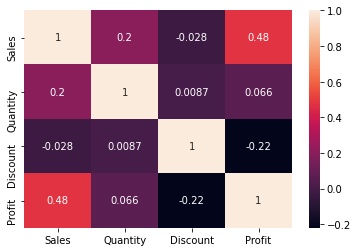

In [ ]:
#finding the correlation between the features
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

Sales and profit are having positive correlation

# Comparing Discount, Profit and Sales

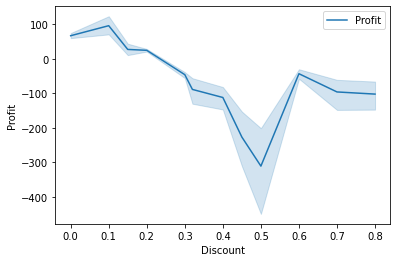

In [ ]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

We can clearly observe that the discount has a negative relation with profit i.e. as the profit is increasing the Profit generated is decreased.

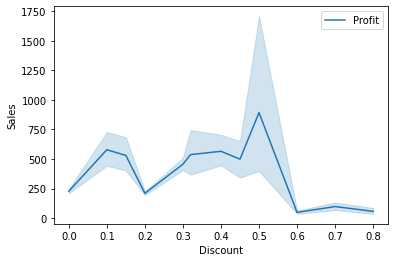

In [ ]:
sns.lineplot(x='Discount',y='Sales',label='Profit',data=df)
plt.legend()
plt.show()

# Exploratory Analysis

**1.Ship Mode**

In [ ]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

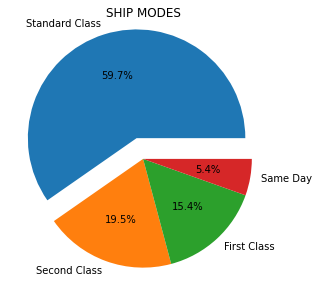

In [ ]:
plt.figure(figsize=(5,5))
plt.title('SHIP MODES')
plt.pie(df['Ship Mode'].value_counts(), labels=df['Ship Mode'].value_counts().index, explode=(0.2,0,0,0), autopct= '%1.1f%%')
plt.show()

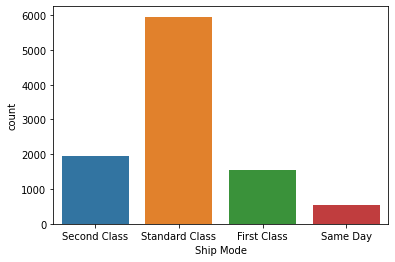

In [ ]:
sns.countplot(x=df['Ship Mode'])

The most preferred shipping mode is Standard Class

In [ ]:
ship_segment = df.groupby(['Segment'])
segment_list = df.Segment.value_counts().index
cat_list = df.Category.value_counts().index

for segment in segment_list:
    seg_shipping = ship_segment.get_group(segment)
    standard, second, first, same = [], [], [], []
    for cat in cat_list:
        count = seg_shipping.groupby(['Category']).get_group(cat)['Ship Mode'].value_counts()
        standard.append(count[0]), second.append(count[1]), first.append(count[2]), same.append(count[3])
        
    fig = go.Figure()
    fig.add_trace(go.Bar(x = cat_list,y = standard,name='Standard Class',marker_color='lightsalmon' ))
    fig.add_trace(go.Bar(x = cat_list,y = second,name='Second Class',marker_color='rgb(250,127,78)' ))
    fig.add_trace(go.Bar(x = cat_list,y = first,name='First Class',marker_color='rgb(234,84,84)'))
    fig.add_trace(go.Bar(x = cat_list,y = same,name='Same Day',marker_color='rgb(137,51,51)' ))

    fig.update_layout(
        barmode ='group',
        width = 900,
        title = segment.upper(),
        yaxis = dict(title = 'Number of Deliveries'))
    fig.show()

Standard class shipping is the most used shipping method across all consumer segments and product categories.
Across all three consumer segments, office supplies are the most bought products, and the technology items are the least bought products.

In [ ]:
df['loss'] = df.Profit.apply(lambda x: x if (x < 0) else 0)

fig = px.bar(df,x = 'Ship Mode', y = 'loss', title = 'Losses in Each Shipping Category'.upper(), 
                    color = 'Ship Mode', hover_data=['loss', 'Sub-Category'])
fig.update_layout(
        autosize = True,
        width = 800,
        yaxis = dict(title='Total Loss'),
        xaxis = dict(title='Shipping Class'),
    )
fig.show()

The highest loss beared by the company was while delivering products via the standard class shipping whereas First and second class shipping have almost equal losses. 

**2. Segment**

In [ ]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

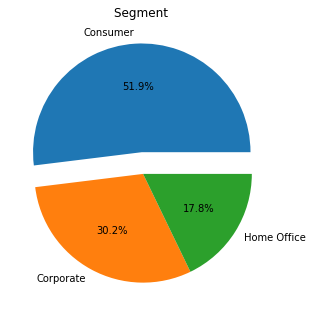

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Segment \n')
plt.pie(df['Segment'].value_counts(), labels=df['Segment'].value_counts().index, explode=(0.2,0,0), autopct= '%1.1f%%')
plt.show()

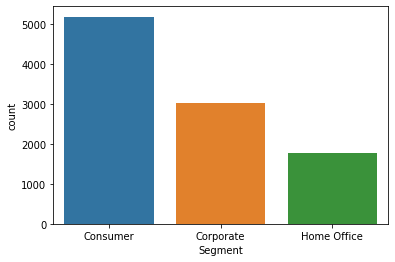

In [ ]:
sns.countplot(x=df['Segment'])
sns.countplot(x='Segment', data=df)

The most buyers are Consumer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



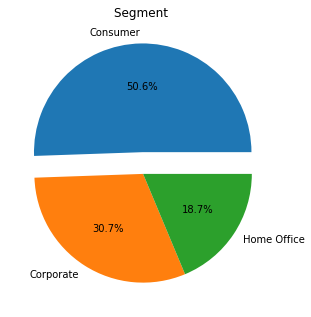

In [ ]:
data = df[['Segment', 'Sales']].groupby(['Segment']).sum()
plt.figure(figsize=(5,5))
plt.title('Segment \n')
plt.pie(data, labels=df['Segment'].value_counts().index, explode=(0.2,0,0), autopct= '%1.1f%%')
plt.show()

Around 50% of the total sales were made in the consumer segment which comprises of the individual buyers.The Corporate sector and Home Office segments have around 31% and 19% sales respectively. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



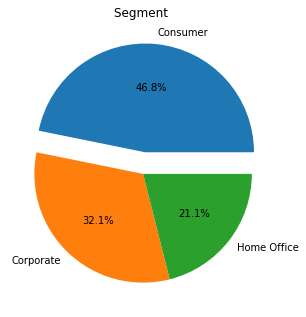

In [ ]:
data = df[['Segment', 'Profit']].groupby(['Segment']).sum()

plt.figure(figsize=(5,5))
plt.title('Segment \n')
plt.pie(data, labels=df['Segment'].value_counts().index, explode=(0.2,0,0), autopct= '%1.1f%%')
plt.show()


The profits made by the consumer segment is less as compared to sales. The Corporate and the Home Office segments returns more profits as compared to the sales. While their combined profit is more than combined sales.They must check out the factors causing losses which must be addressed in order to increase profits.



**3.category**

In [ ]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

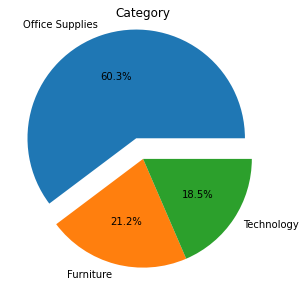

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Category')
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().index,explode=(0.2,0,0),autopct='%1.1f%%')
plt.show()

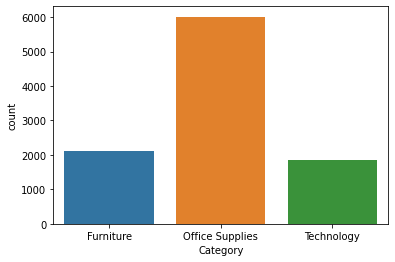

In [ ]:
sns.countplot(x='Category',data=df)

The most sold category is office supplies

**4.Sub-category**

In [ ]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

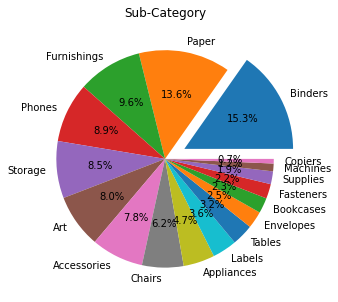

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Sub-Category')
plt.pie(df['Sub-Category'].value_counts(),labels=df['Sub-Category'].value_counts().index,explode=(0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),autopct='%1.1f%%')
plt.show()

The Most sold item is Binder

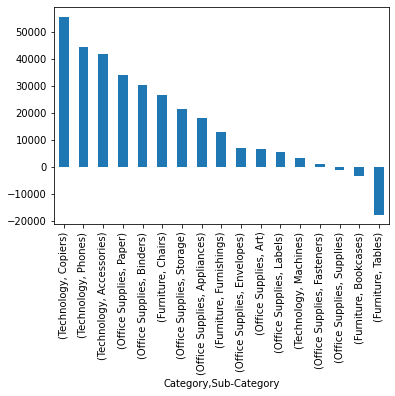

In [ ]:
#Based on Total Profit or Loss
k=df.groupby(['Category','Sub-Category'])['Profit'].sum().nlargest(17)
k.plot.bar()

We found out that from category = Office supplies, Supplies is facing loss. Where as from Category = Furniture, Bookcases and table are facing loses where as Copiers and phones of Technology category are Profit making items.

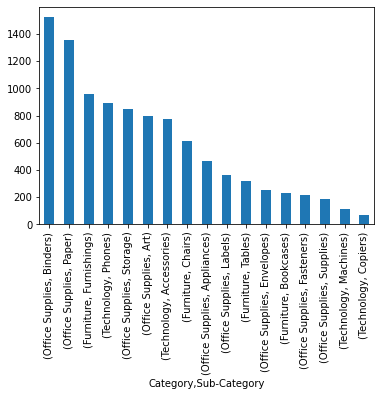

In [ ]:
#Based on Most sold items
k=df.groupby(['Category','Sub-Category'])['Sales'].count().nlargest(17)
k.plot.bar()

The Copiers and Machines of category Technology are among the least sold items where as Binders and paper of Office supplier category are among the most sold items

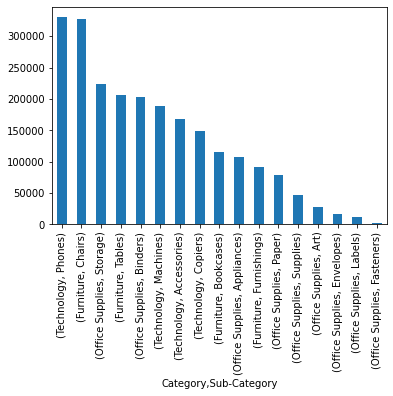

In [ ]:
# Based on Total Revenue
k=df.groupby(['Category','Sub-Category'])['Sales'].sum().nlargest(17)
k.plot.bar()

The least Revenue Earning items include Fasteners, labels and Envelopes of Category Office suppliers whereas phone of Technology category and chairs of Furniture category are the most revenue Earning items

In [ ]:
df['price_per_product'] = df.Sales / df.Quantity
df['profit_per_product'] = df.Profit / df.Quantity 
data = df.groupby(['Category'])

for cat, df in data:
    sizes = np.absolute(df.price_per_product)
    fig = px.scatter(df, x = 'price_per_product', title = cat.upper(), 
                    color = 'Sub-Category',
                    size = sizes, hover_data=['Sub-Category'])
    fig.update_layout(
        height = 600,
        xaxis = dict(title='Price Per Product'),
        yaxis = dict(title=''),
    )
    fig.show()

 The most expensive item in the furniture category is bookcase.The most expensive item in the Office Supplies category are Binders and supplies.The most expensive item in the Technology may be
products like machines and copiers 



In [ ]:
for mo, df in data:
    sizes = np.absolute(df.profit_per_product)
    fig = px.scatter(df, x = 'profit_per_product', title = mo.upper(), 
                    color = 'Sub-Category',
                    size = sizes, hover_data=['Sub-Category'])
    fig.update_layout(
        autosize = True,
        height = 600,
        xaxis = dict(title='Profit/Loss Per Product'),
        yaxis = dict(title=''),
    )
    fig.show()

The Furniture such as tables and Bookcases are one of the businesses where the supermarket is losing most of its money. whereas chairs seem to be generating the highest profits for the supermarket.
The Office Supplies such as binders causes highest profits and the highest-loss. In Technology machine sales cause the highest loss and copier causes the highest profit.

In [ ]:
for mo, df in data:
    submo = df.groupby(['Sub-Category']).sum()
    fig = px.bar(submo, y = 'Profit', title = mo.upper(), color = submo.index)
    fig.update_layout(
        autosize = True,
        width = 900,
        yaxis = dict(title='Profit/Loss Per Product Sub-Category'),
        xaxis = dict(title=''),
    )
    fig.show()

The Furniture such as tables and bookcases are the sub categories which encounters Loss. The technology business is most profits making category where the machines business makes the least profit. The chance of improvement in this category is possible. The furniture business is barely making any profit.  So we need to find the appropriate reason for this problem.

**5.Cities**

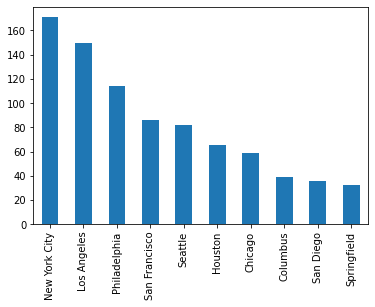

In [ ]:
#The top 10 Best selling cities based on no of sales
m=df['City'].value_counts().head(10)
m.plot.bar()

**6.States**

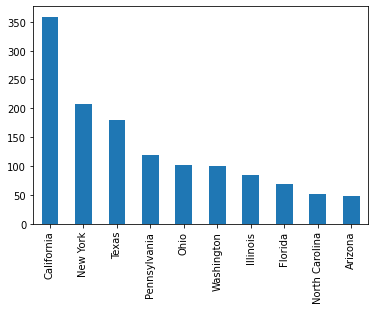

In [ ]:
#The top 10 Best selling states  based on no of sales
m=df['State'].value_counts().head(10)
m.plot.bar()

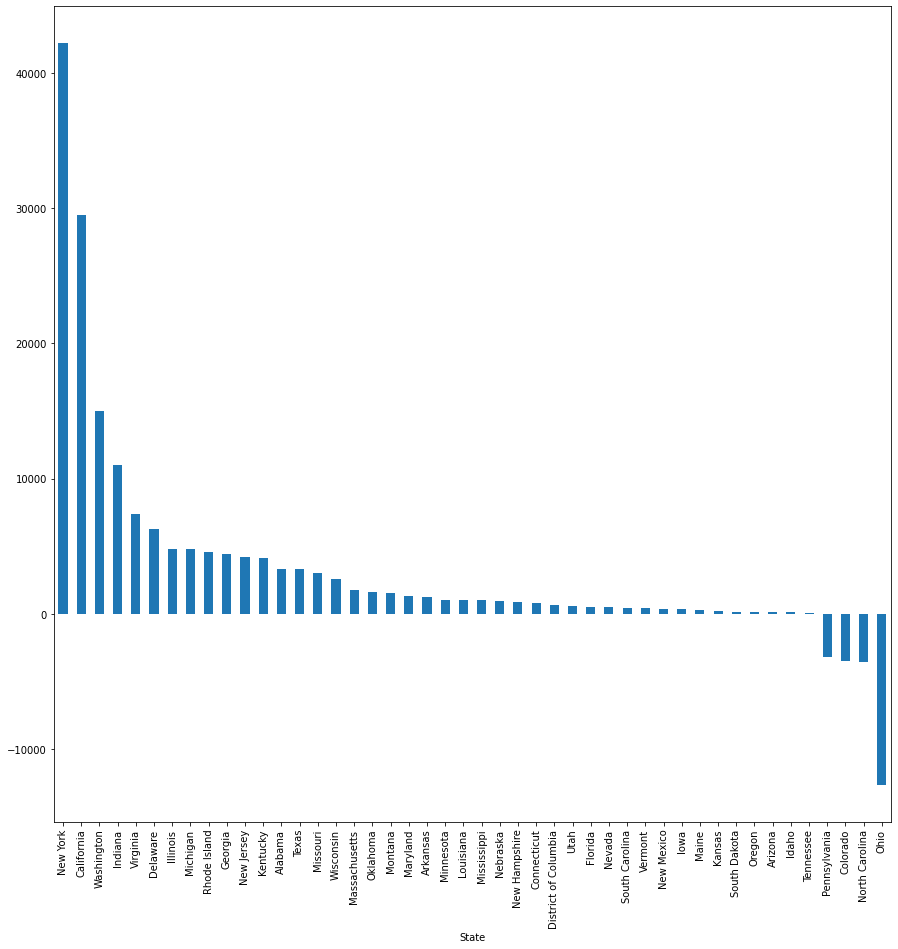

In [ ]:
plt.figure(figsize=(15,15))
stpr=df.groupby(['State'])['Profit'].sum().nlargest(50)
stpr.plot.bar()

Generated Graph Displays that California and New York have the highest profits while Texas and Ohio have the least profits.

In [ ]:
state_data = df[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

fig.show()

The highest selling state are California and New York. 

In [ ]:
fig = go.Figure(data=go.Choropleth(locations=state_data.index, z = state_data.Profit, locationmode = 'USA-states',
    colorscale = [[0, 'rgb(0,0,255)'], [0.25, 'rgb(50,205,50)'], [0.45, 'rgb(255, 255, 0)'], [0.6, 'rgb(255, 165, 0)'], [1, 'rgb(220,0,0)']],
    colorbar_title = 'Profits in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Profit/Loss',
    geo_scope='usa', 
    height=800,
)

fig.show()

The states in red color represent most profitable states such as **New York**, **California** and **Washington**.
The states in orange and yellow represent average profitable state.
The state like **Texas** are considered as high loss making state denoted by dark green and blue Color.

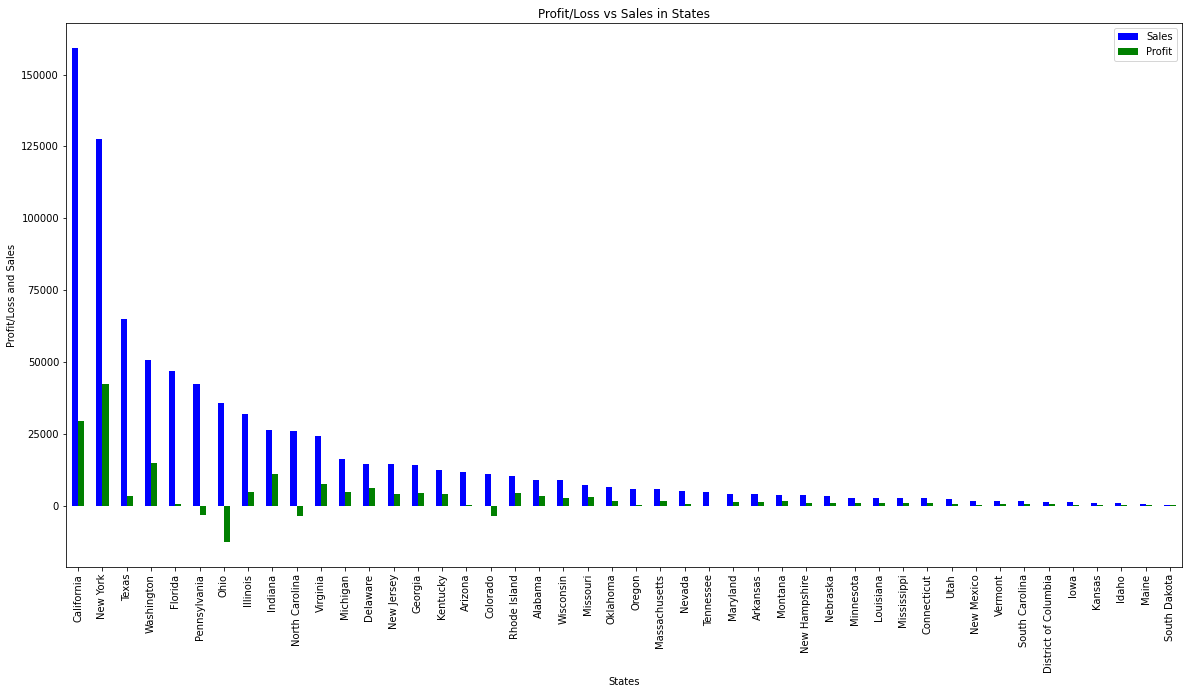

In [ ]:
pls=df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
pls[:].plot.bar(color=['blue','green'],figsize=(20,10))
plt.title('Profit/Loss vs Sales in States')
plt.xlabel('States')
plt.ylabel('Profit/Loss and Sales')
plt.show()

**7.Region**

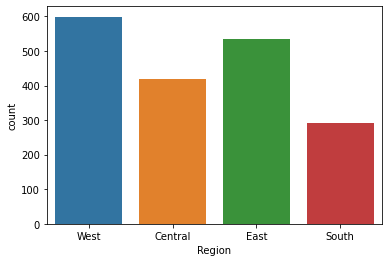

In [ ]:
df['Region'].value_counts()
sns.countplot(x='Region',data=df)

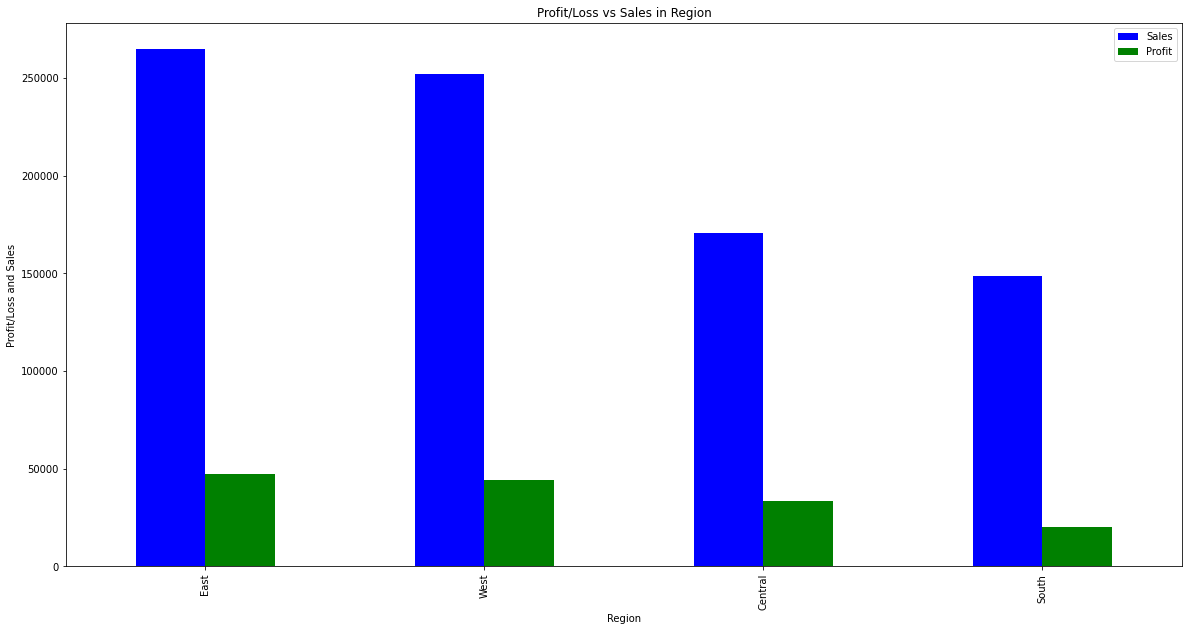

In [ ]:
pls=df.groupby('Region')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
pls[:].plot.bar(color=['blue','green'],figsize=(20,10))
plt.title('Profit/Loss vs Sales in Region')
plt.xlabel('Region')
plt.ylabel('Profit/Loss and Sales')
plt.show()

We will observe that the supermarket company does most of its business in East Coast and West Coast region.And South is least selling region

# Analysis On the Basis of Discount


In [ ]:
df['whether_discount'] = df.Discount.apply(lambda x: 'No Discount' if (x == 0) else 'Discount')

discount_data = df.groupby(['whether_discount']).mean()

def discount_plot(data_type = 'total'):
    color = ['rgb(81,81,246)', 'rgb(209,70,70)']
    if data_type == 'average':
        d_data = df.groupby(['whether_discount']).mean()
        fig = make_subplots(rows=1, cols=3, subplot_titles=('AVERAGE SALE', 'AVERAGE PROFIT/LOSS', 'AVERAGE PRICE PER PRODUCT'))
    else:
        d_data = df.groupby(['whether_discount']).sum()
        fig = make_subplots(rows=1, cols=3, subplot_titles=('TOTAL SALE', 'TOTAL PROFIT/LOSS', 'TOTAL PRICE PER PRODUCT'))
    fig.add_trace(
        go.Bar(x = d_data.index, y = d_data.Sales, marker_color = color),
            row=1, col=1
    )

    fig.add_trace(
        go.Bar(x = d_data.index, y = d_data.Profit, marker_color = color),
            row=1, col=2
    )

    fig.add_trace(
        go.Bar(x = d_data.index, y = d_data.price_per_product, marker_color = color),
            row=1, col=3
    )
    fig.update_layout(showlegend=False)
    fig.show()
    

discount_plot('average')
discount_plot()


It seems that for both average and total sales, people tend to buy more things when it is selling at a discounted price than without discount although price of the discount product is higher than undiscount product. 

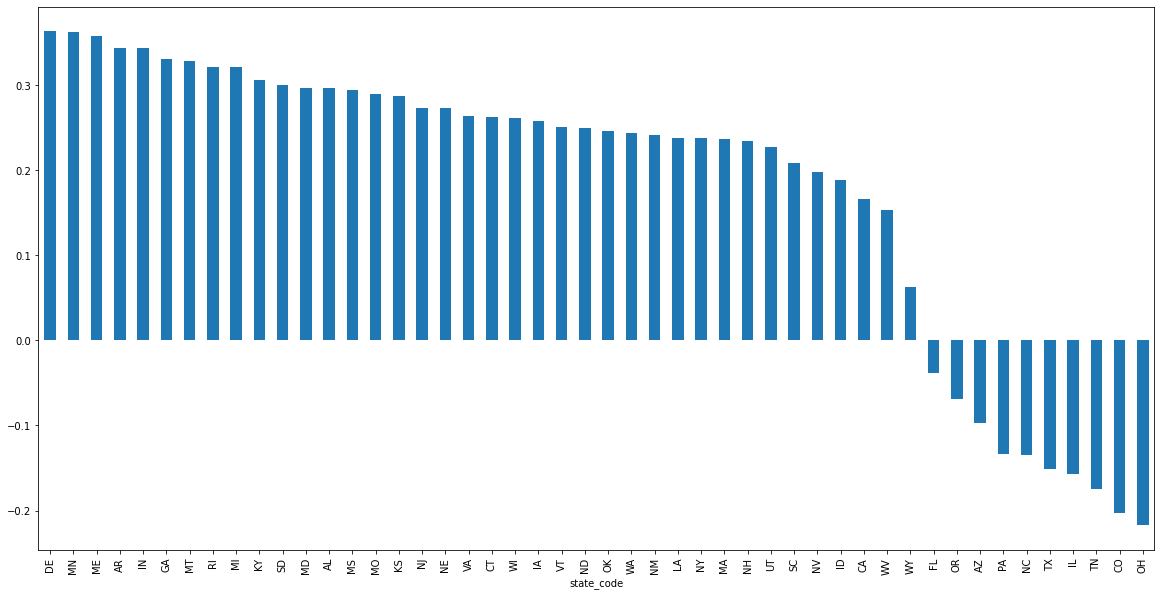

In [ ]:
state_data = same_df[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()

# price_to_sales ratio
state_data['profit_to_sales'] = state_data['Profit'] / state_data['Sales']

# adding state name
state_name = {v: k for k, v in state_code.items()}
state_data['States'] = state_data.index
state_data['States'] = state_data.States.apply(lambda x: state_name[x])

# sorting the dataframe
state_data = state_data.sort_values(by = ['profit_to_sales'], ascending=False)
state_data['profit_to_sales'].plot.bar(figsize=(20,10))

Ohio has the worst profit-to-sales ratio whereas Delaware has the highest profit-to-sales ratio.The largest profits making states like New York, California and Washington DC don't have the highest profit-to-sales ratio. 
**Thus improvement of sales/profits in these states are possible.**


#Profit/Loss Analysis of Particular States where Profit to sales ratio is low

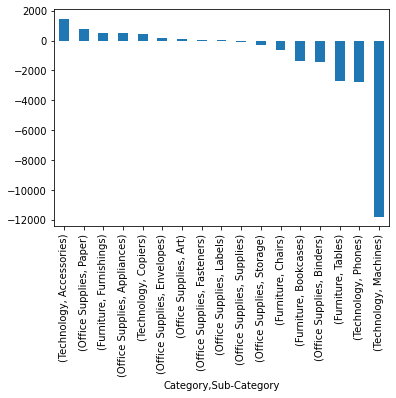

In [ ]:
j=same_df[['Category','Sub-Category','Profit']][same_df['state_code']=='OH'].groupby(['Category','Sub-Category'])['Profit'].sum().nlargest(17)
j.plot.bar()


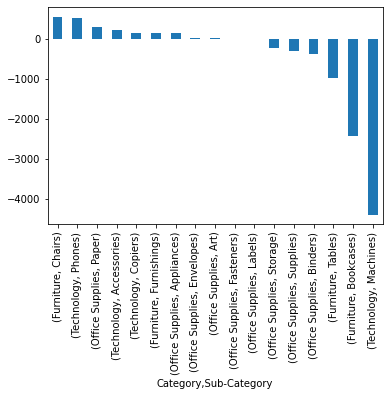

In [ ]:
j=same_df[['Category','Sub-Category','Profit']][same_df['state_code']=='CO'].groupby(['Category','Sub-Category'])['Profit'].sum().nlargest(17)
j.plot.bar()


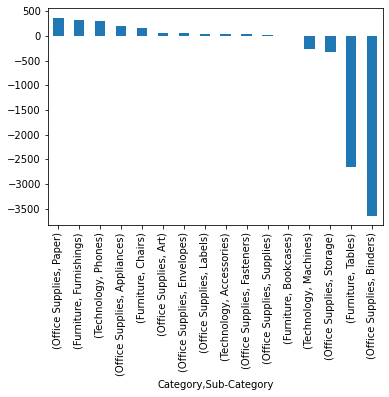

In [ ]:
j=same_df[['Category','Sub-Category','Profit']][same_df['state_code']=='TN'].groupby(['Category','Sub-Category'])['Profit'].sum().nlargest(17)
j.plot.bar()


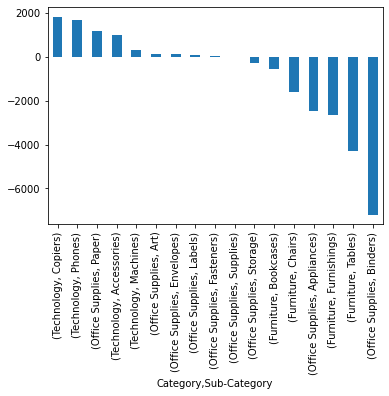

In [ ]:
j=same_df[['Category','Sub-Category','Profit']][same_df['state_code']=='IL'].groupby(['Category','Sub-Category'])['Profit'].sum().nlargest(17)
j.plot.bar()


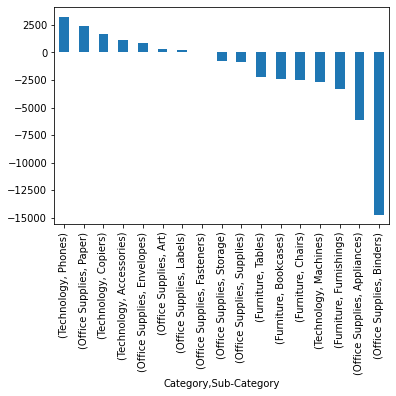

In [ ]:
j=same_df[['Category','Sub-Category','Profit']][same_df['state_code']=='TX'].groupby(['Category','Sub-Category'])['Profit'].sum().nlargest(17)
j.plot.bar()


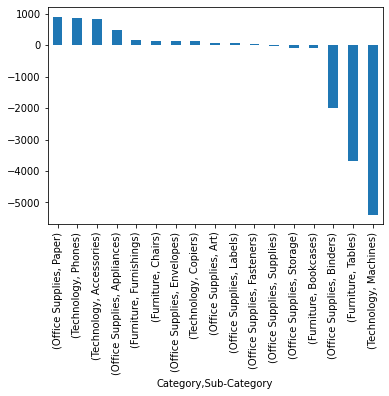

In [ ]:
j=same_df[['Category','Sub-Category','Profit']][same_df['state_code']=='NC'].groupby(['Category','Sub-Category'])['Profit'].sum().nlargest(17)
j.plot.bar()



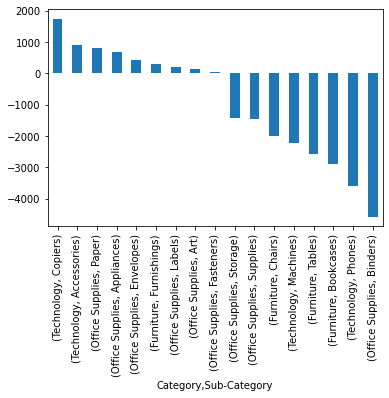

In [ ]:
j=same_df[['Category','Sub-Category','Profit']][same_df['state_code']=='PA'].groupby(['Category','Sub-Category'])['Profit'].sum().nlargest(17)
j.plot.bar()


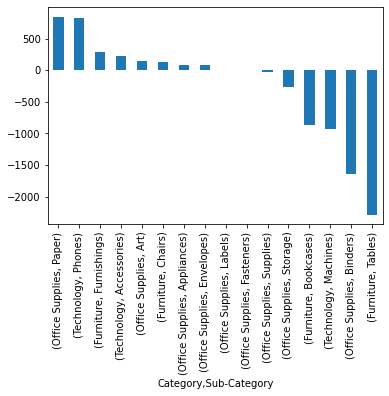

In [ ]:
j=same_df[['Category','Sub-Category','Profit']][same_df['state_code']=='AZ'].groupby(['Category','Sub-Category'])['Profit'].sum().nlargest(17)
j.plot.bar()


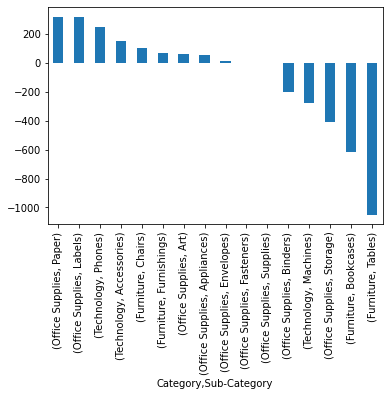

In [ ]:
j=same_df[['Category','Sub-Category','Profit']][same_df['state_code']=='OR'].groupby(['Category','Sub-Category'])['Profit'].sum().nlargest(17)
j.plot.bar()


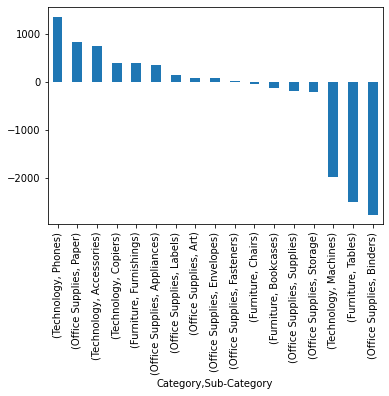

In [ ]:
j=same_df[['Category','Sub-Category','Profit']][same_df['state_code']=='FL'].groupby(['Category','Sub-Category'])['Profit'].sum().nlargest(17)
j.plot.bar()


* we should find the reason behind loss in products like Machine, Phones, table, binder, bookcases,chairs, storage, supplies in the state of Ohio.
* we should find the reason behind loss in products like Machine, Phones, binder, bookcases, table, chairs, supplies, storage in the state of Pennsylvania
* we should find the reason behind loss in products like Machine, table, bookcases, storage, binder in the state of Oregon
* we should find the reason behind loss in products like Machine, table, bookcases, storage, binder, supplies in the state of Arizona
* we should find the reason behind loss in products like Machine , table, binder, bookcases storage,supplies in the state of North Carolina
* we should find the reason behind loss in products like Machine, binder, appliances, furnishings, chairs, bookcases, table, supplies, storage in the state of Texas
* we should find the reason behind loss in products like Machine, binder, tables, storage in the state of Tennessee
* we should find the reason behind loss in products like Machine, bookcases, table, binder, supplies, storage in the state of Colorado
* we should find the reason behind loss in products like binder, appliances, furnishings, chairs, bookcases, table, storage in the state of Illinois
* We should find the reason behind loss in products like Machine, Binder, table, storage,supplies, bookcases, chairs, Fasteners in the state of Florida.

